# General Statistics

See if there are no tasks periods that are incorporated within task windows. If there are periods with no tasks, label them as idling or something

In [1]:
from utils.data_processing import EyeTrackingProcessor
from utils.task_data_io import PARQUET_NAME, list_parquet_files

root_dir = "/store/kruu/eye_tracking/training_data"
processor = EyeTrackingProcessor()
file_index = list_parquet_files(root_dir)
dfs, task_map = processor.load_data(file_index, want_columns=["Event", "Recording timestamp [ms]", "epoch_ms"])
task_bounds = processor.collect_task_boundaries(dfs, export_path="task_boundaries.csv")

⚠️ Unmatched 'end' for Task 5 at 3459514
⚠️ Unmatched 'start' for Task 3 at 3443448
⚠️ Unmatched 'end' for Task 5 at 1475678
⚠️ Unmatched 'end' for Task 3 at 732128
⚠️ Unmatched 'end' for Task 8 at 1168579
⚠️ Unmatched 'end' for Task 1 at 1407071
⚠️ Unmatched 'start' for Task 12 at 1171948
⚠️ Unmatched 'end' for Task 7 at 1407679
⚠️ Unmatched 'end' for Task 8 at 3096761
⚠️ Unmatched 'end' for Task 0 at 3174255
⚠️ Unmatched 'start' for Task 1 at 695652
⚠️ Unmatched 'start' for Task 12 at 3785377
⚠️ Unmatched 'start' for Task 13 at 3467085
⚠️ Unmatched 'start' for Task 13 at 3467602
⚠️ Unmatched 'start' for Task 13 at 3467757
⚠️ Unmatched 'start' for Task 6 at 1395939
⚠️ Unmatched 'start' for Task 4 at 3513371
⚠️ Unmatched 'end' for Task 1 at 2525380
⚠️ Unmatched 'end' for Task 13 at 3253527
⚠️ Unmatched 'start' for Task 12 at 3248347
⚠️ Unmatched 'end' for Task 13 at 2910462
⚠️ Unmatched 'end' for Task 7 at 3179705
⚠️ Unmatched 'end' for Task 1 at 346849
⚠️ Unmatched 'end' for Task 12 a

In [1]:
from utils.helper import load_and_process

root_dir = "/store/kruu/eye_tracking/training_data"
features = ["epoch_ms", 'Recording timestamp [ms]', 'Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y', 'Event']
interpolate_cols = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y', "Blink"]
fill_columns = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y']

chunks, blinks, atco_task_map  = load_and_process(root_dir=root_dir, 
                                                    columns=features, 
                                                    interpolate_cols=interpolate_cols, 
                                                    fill_cols=fill_columns, 
                                                    time_resampling=False, 
                                                    fixed_window_ms=None, # Size of the chunk window. None if chunk per task
                                                    # window_step_ms=2000, # Time step from one window to another. None is no overlap
                                                    # min_task_presence=0.5 # Min proportion of task presence for assigning a label
                                                    )

Finding tasks for participant 001 Scenario 1
⚠️ Unmatched 'end' for Task 5 at 3459514
⚠️ Unmatched 'start' for Task 3 at 3443448
Finding tasks for participant 001 Scenario 2
⚠️ Unmatched 'end' for Task 5 at 1475678
Finding tasks for participant 001 Scenario 3
Finding tasks for participant 002 Scenario 1
⚠️ Unmatched 'end' for Task 3 at 732128
⚠️ Unmatched 'end' for Task 8 at 1168579
⚠️ Unmatched 'end' for Task 1 at 1407071
⚠️ Unmatched 'start' for Task 12 at 1171948
Finding tasks for participant 002 Scenario 2
⚠️ Unmatched 'end' for Task 7 at 1407679
⚠️ Unmatched 'end' for Task 8 at 3096761
⚠️ Unmatched 'end' for Task 0 at 3174255
⚠️ Unmatched 'start' for Task 1 at 695652
⚠️ Unmatched 'start' for Task 12 at 3785377
⚠️ Unmatched 'start' for Task 13 at 3467085
⚠️ Unmatched 'start' for Task 13 at 3467602
⚠️ Unmatched 'start' for Task 13 at 3467757
⚠️ Unmatched 'start' for Task 6 at 1395939
⚠️ Unmatched 'start' for Task 4 at 3513371
Finding tasks for participant 002 Scenario 3
⚠️ Unmatched

In [2]:
atco_task_map

{'Aircraft requests': 'Task 0',
 'Assume': 'Task 1',
 'Conflict resolution': 'Task 2',
 'Entry conditions': 'Task 3',
 'Entry conflict resolution': 'Task 4',
 'Entry coordination': 'Task 5',
 'Exit conditions': 'Task 6',
 'Exit conflict resolution': 'Task 7',
 'Exit coordination': 'Task 8',
 'Non-conformance resolution': 'Task 9',
 'QoS': 'Task 10',
 'Return to route': 'Task 11',
 'Transfer': 'Task 12',
 'Zone conflict': 'Task 13'}

In [2]:
len(chunks)

31793

# WARNING: CHECK THE SAMPLING RATE OF THE MOUSE DATA
- Change the timestamp to the one in polaris and not Tobii 
- Examiner la confusion matrix du xgboost
- Examiner asd_events.proto et sélectionner certains fields qui peuvent être useful
- Attention pour XG boost au drop des chunks qui n'ont pas suffisamment de task. Il faut supprimer ce drop car on a idle.

In [ ]:
chunks['001_1_5_0']

,Recording timestamp [ms],Gaze point X [DACS px],Gaze point Y [DACS px],Mouse position X,Mouse position Y,Blink,id,Participant name,Task_id,Task_execution
0,138550,1099.000000,281.000000,2045.0,755.0,False,001_1_5_0,001,5,0
1,138560,1096.750000,281.250000,2045.0,755.0,False,001_1_5_0,001,5,0
2,138570,1094.666667,286.555556,2045.0,755.0,False,001_1_5_0,001,5,0
3,138580,1093.000000,283.500000,2045.0,755.0,False,001_1_5_0,001,5,0
4,138590,1094.750000,285.000000,2045.0,755.0,False,001_1_5_0,001,5,0
...,...,...,...,...,...,...,...,...,...,...
995,148500,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0
996,148510,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0
997,148520,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0
998,148530,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0


In [4]:
# Identifies chunk where there could be several labels. The label has been assigned in get_fixed_window_chunks according to the most present task in the window
print("Chunks that have several labels: ")
for df in chunks.values():
    if len(df["Task_id"].unique()) > 1:
        print(f"{df["id"]}: {df["Task_id"].unique()}")

Chunks that have several labels: 


In [5]:
# Chunks that have all missing values in one of the column

cols = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]',
        'Mouse position X', 'Mouse position Y']
count = 0

for uid, df in chunks.items():
    present = [c for c in cols if c in df.columns]
    bad_cols = [c for c in present if df[c].isna().all()]

    if bad_cols:
        count +=1
        # id_val = df['id'].iat[0] if 'id' in df.columns else uid
        # print(f"{id_val}: all-missing columns -> {bad_cols}")
print(count/len(chunks))

0.06819111125090428


In [6]:
# Chunks that have constant blinks: over 10s it is unlikely
import numpy as np

blinks_per_chunk = {k: int(d["Blink"].astype(bool).groupby((~d["Blink"].astype(bool)).cumsum()).any().sum()) for k, d in chunks.items()}

const_flags = {uid: (d["Blink"].dropna().nunique() <= 1) for uid, d in chunks.items()}
prop_constant = float(np.mean(list(const_flags.values())))
print(f"Proportion constant Blink: {prop_constant:.3f}")
# ids with constant Blink:
# print([uid for uid, is_const in const_flags.items() if is_const])

Proportion constant Blink: 0.289


In [7]:
from collections import Counter

print("Number of total occurences per task: ")
task_window_counts = Counter(int(df["Task_id"].iloc[0]) for df in chunks.values())
for task_id in sorted(task_window_counts):
    print(f"Task {task_id}: {task_window_counts[task_id]} windows")

Number of total occurences per task: 
Task 0: 2194 windows
Task 1: 5885 windows
Task 2: 2192 windows
Task 3: 285 windows
Task 4: 183 windows
Task 5: 2492 windows
Task 6: 548 windows
Task 7: 98 windows
Task 8: 1717 windows
Task 9: 340 windows
Task 10: 1106 windows
Task 11: 1982 windows
Task 12: 8744 windows
Task 13: 4027 windows


****
# Plot Data
****

013_3_13_65


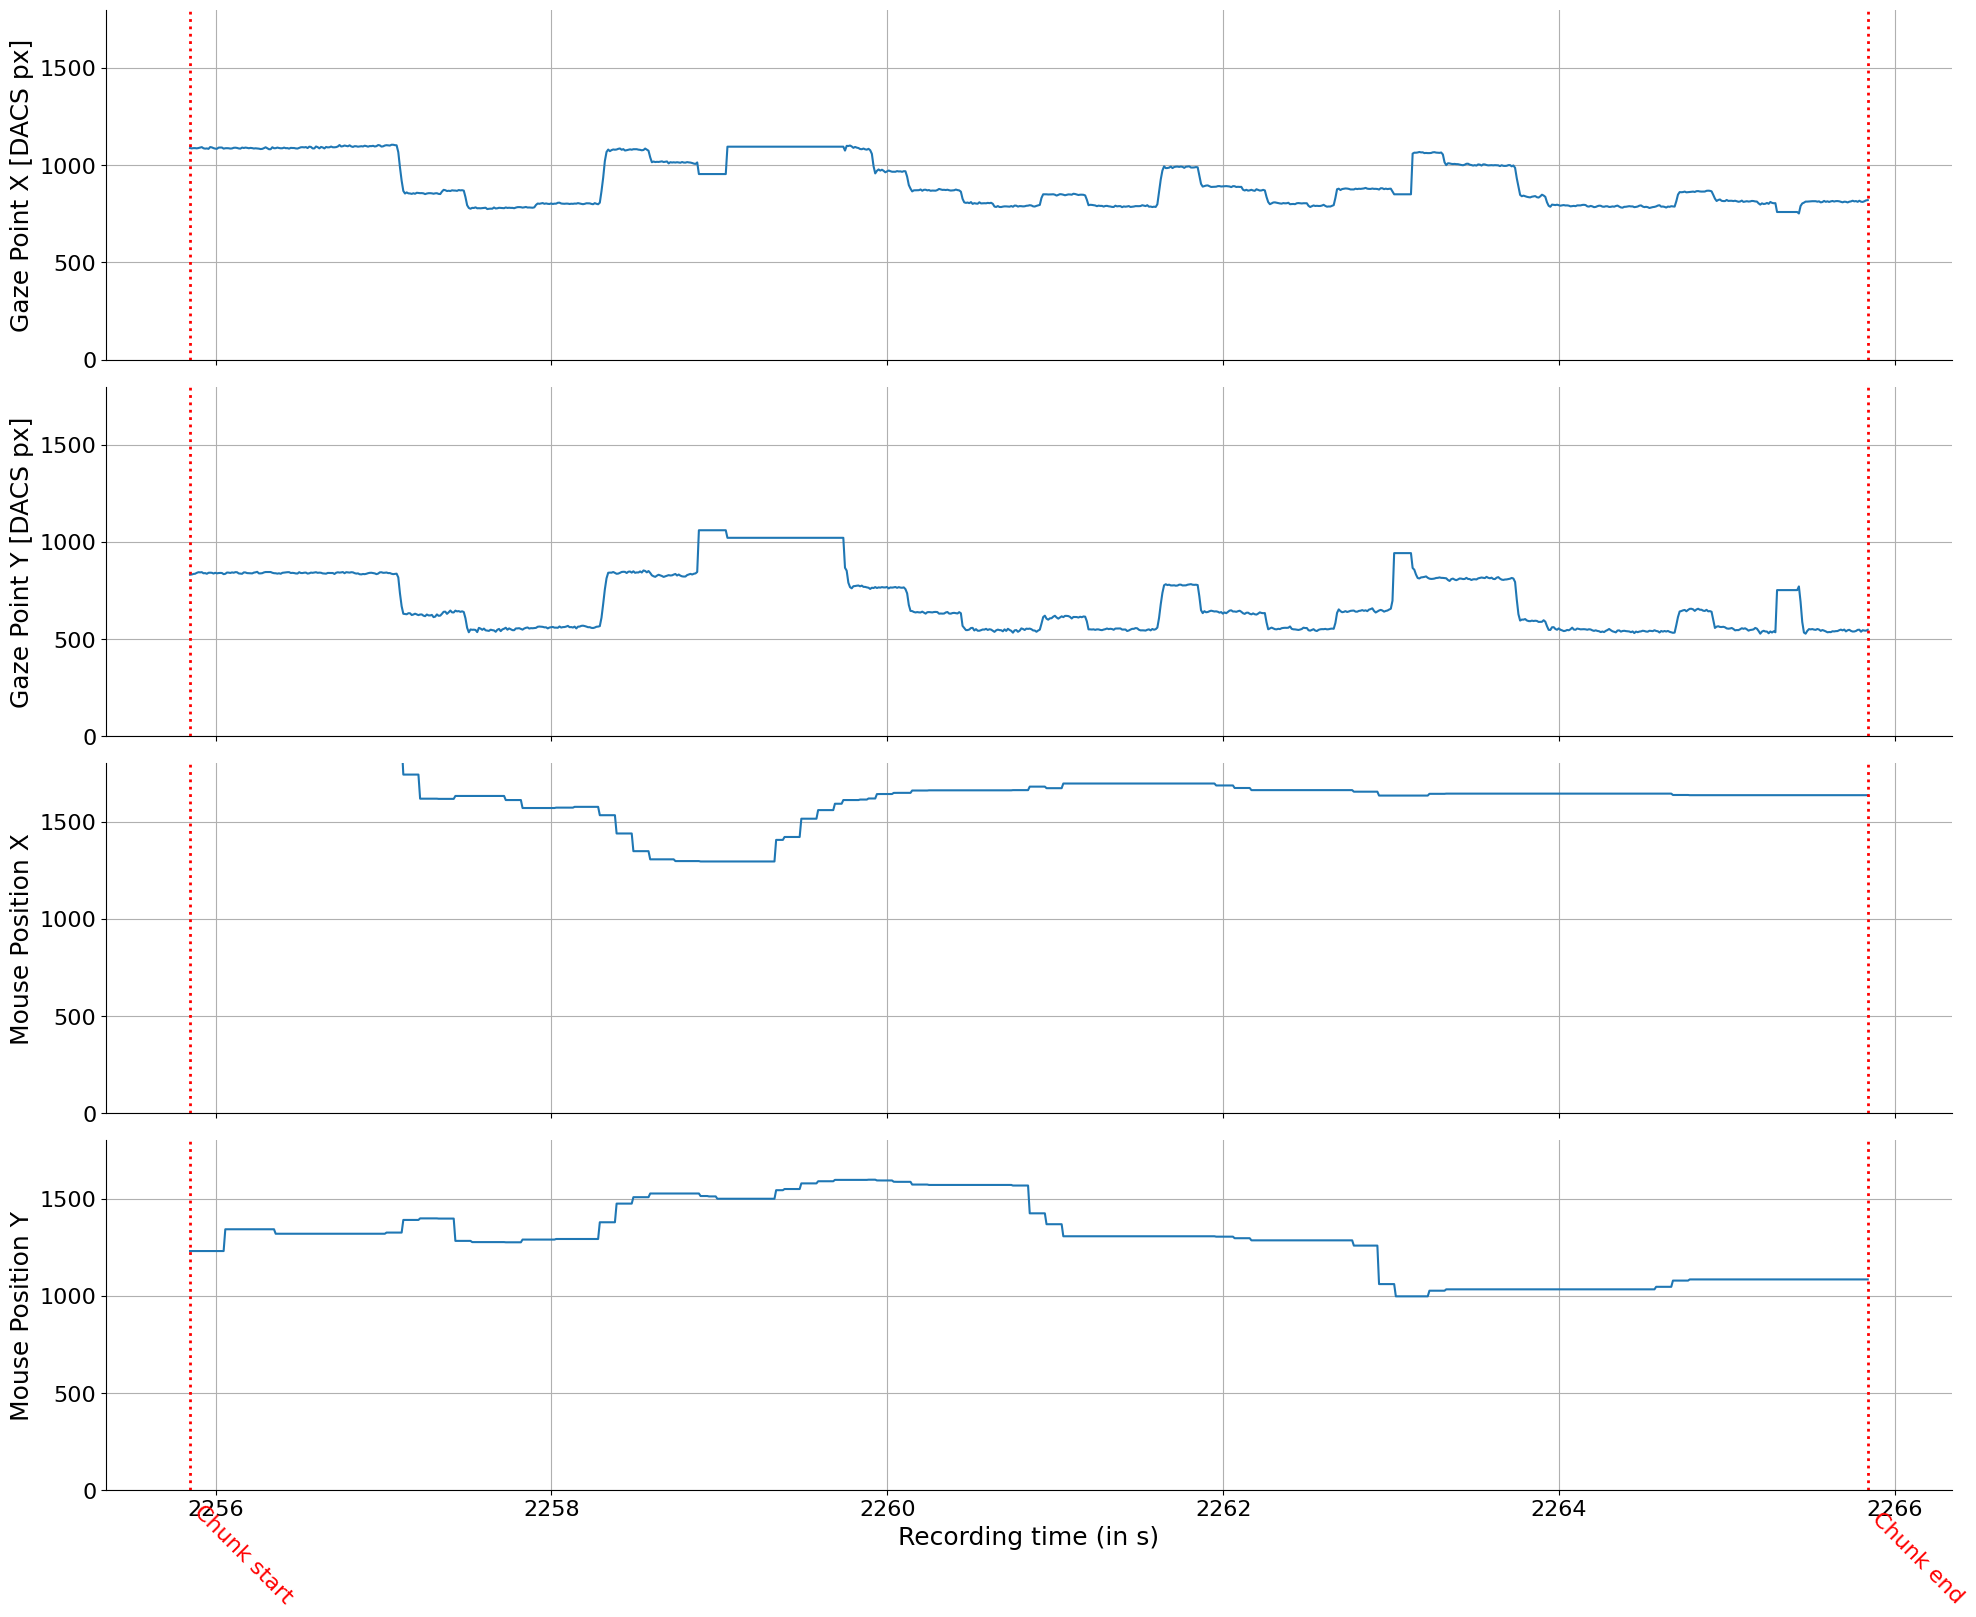

In [8]:
import matplotlib.pyplot as plt
import random

id_task = random.choice(list(chunks.keys()))
print(id_task)
task_plot = chunks[id_task]

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
# Convert timestamps to seconds
timestamps_sec = task_plot["Recording timestamp [ms]"] / 1e3
start_time_sec = task_plot.iloc[0]["Recording timestamp [ms]"] / 1e3
end_time_sec = task_plot.iloc[-1]["Recording timestamp [ms]"] / 1e3

# Titles for each subplot
titles = ['Gaze Point X [DACS px]', 'Gaze Point Y [DACS px]', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task_plot[col], label=title)
    ax.axvline(x=start_time_sec, color='red', linestyle=':', linewidth=2)
    ax.axvline(x=end_time_sec, color='red', linestyle=':', linewidth=2)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Add labels directly to vertical lines on the top subplot only
axs[-1].text(start_time_sec, -600, 'Chunk start', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)
axs[-1].text(end_time_sec, -600, 'Chunk end', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()


## Blinks

In [9]:
blinks[id_task]

,run_id,duration_ms,start_ts,end_ts,blink,loss_of_attention
1,3,150.0,2258890,2259040,True,False
2,5,675.0,2259065,2259740,True,True


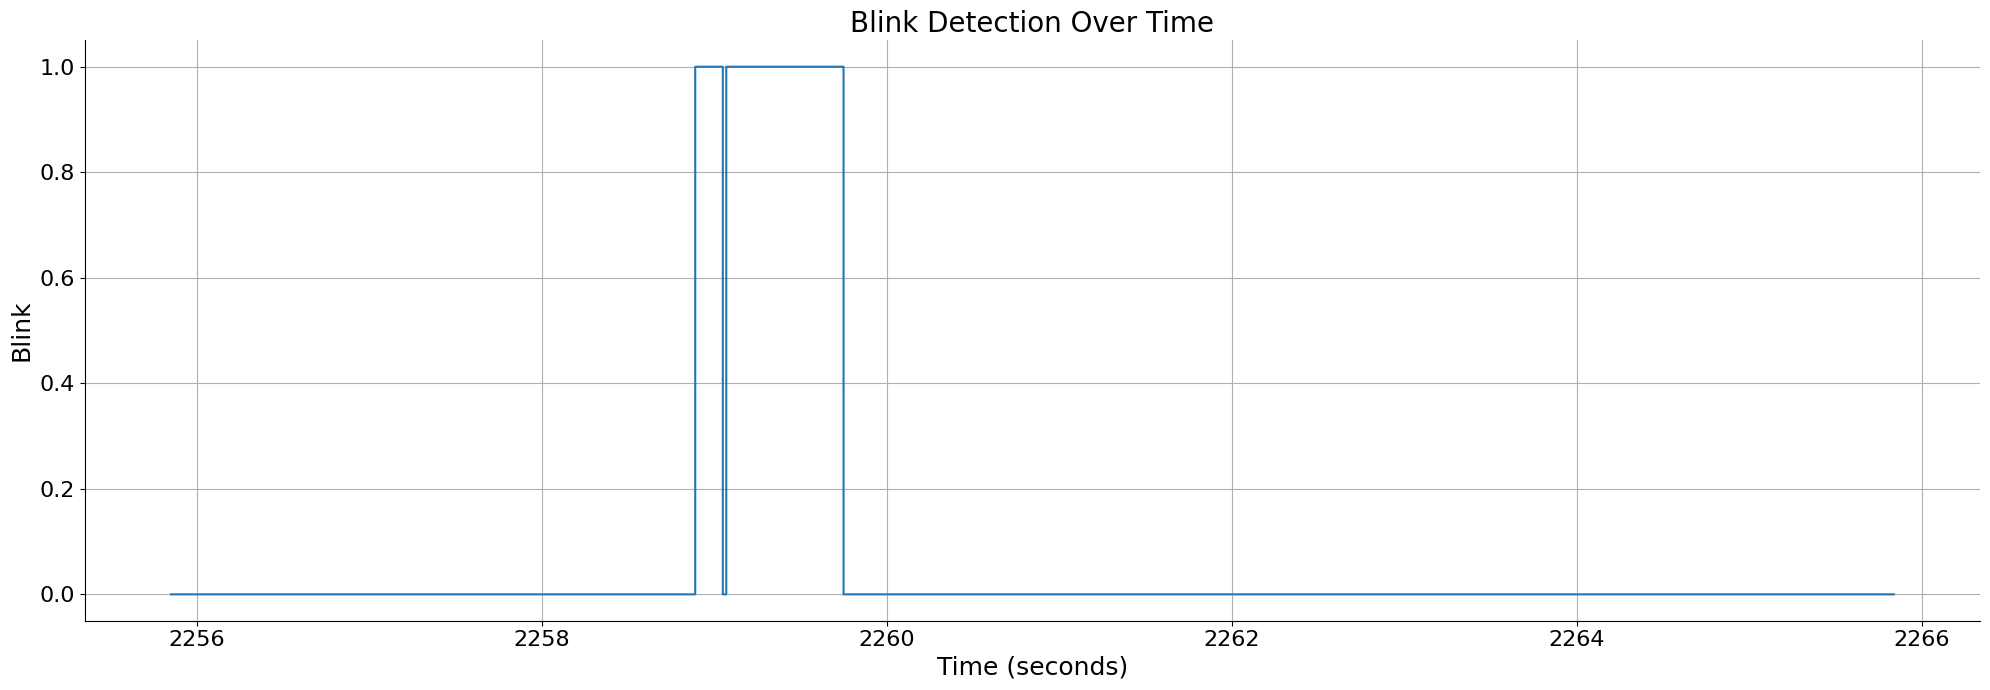

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7), sharex=True)
# Convert timestamps to seconds
timestamps_sec = chunks[id_task]["Recording timestamp [ms]"] / 1e3

ax.step(timestamps_sec, chunks[id_task]["Blink"], label="Blink", where="post", color='tab:blue')
ax.set_ylabel("Blink", fontsize=18)
ax.set_xlabel("Time (seconds)", fontsize=18)
ax.set_title("Blink Detection Over Time", fontsize=20)
ax.grid(True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

****
# JCAFNET Processing
****

In [ ]:
from trainings._01_jcafnet_training import enrich_with_gaze_mouse_metrics
jcafnet_enriched_chunks = enrich_with_gaze_mouse_metrics(chunks)

Enriching features: 100%|██████████| 31793/31793 [04:38<00:00, 113.98it/s]


In [16]:
jcafnet_enriched_chunks['001_1_5_0']

,Recording timestamp [ms],Gaze point X [DACS px],Gaze point Y [DACS px],Mouse position X,Mouse position Y,Blink,id,Participant name,Task_id,Task_execution,Gaze Velocity,Gaze Acceleration,Mouse Velocity,Mouse Acceleration,Gaze-Mouse Distance,Angle Between Gaze and Mouse
0,138550,1099.000000,281.000000,2045.0,755.0,False,001_1_5_0,001,5,0,0.000000,0.000000,0.0,0.0,1058.107745,-2.677100
1,138560,1096.750000,281.250000,2045.0,755.0,False,001_1_5_0,001,5,0,226.384628,0.000000,0.0,0.0,1060.008078,-2.678261
2,138570,1094.666667,286.555556,2045.0,755.0,False,001_1_5_0,001,5,0,569.992961,34360.833230,0.0,0.0,1059.515758,-2.683620
3,138580,1093.000000,283.500000,2045.0,755.0,False,001_1_5_0,001,5,0,348.054558,-22193.840281,0.0,0.0,1062.363521,-2.681734
4,138590,1094.750000,285.000000,2045.0,755.0,False,001_1_5_0,001,5,0,230.488611,-11756.594652,0.0,0.0,1060.129739,-2.682269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148500,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0,0.000000,0.000000,0.0,0.0,1631.383878,-1.853166
996,148510,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0,0.000000,0.000000,0.0,0.0,1631.383878,-1.853166
997,148520,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0,0.000000,0.000000,0.0,0.0,1631.383878,-1.853166
998,148530,1053.444444,309.222222,1508.0,1876.0,True,001_1_5_0,001,5,0,0.000000,0.000000,0.0,0.0,1631.383878,-1.853166


008_2_11_33


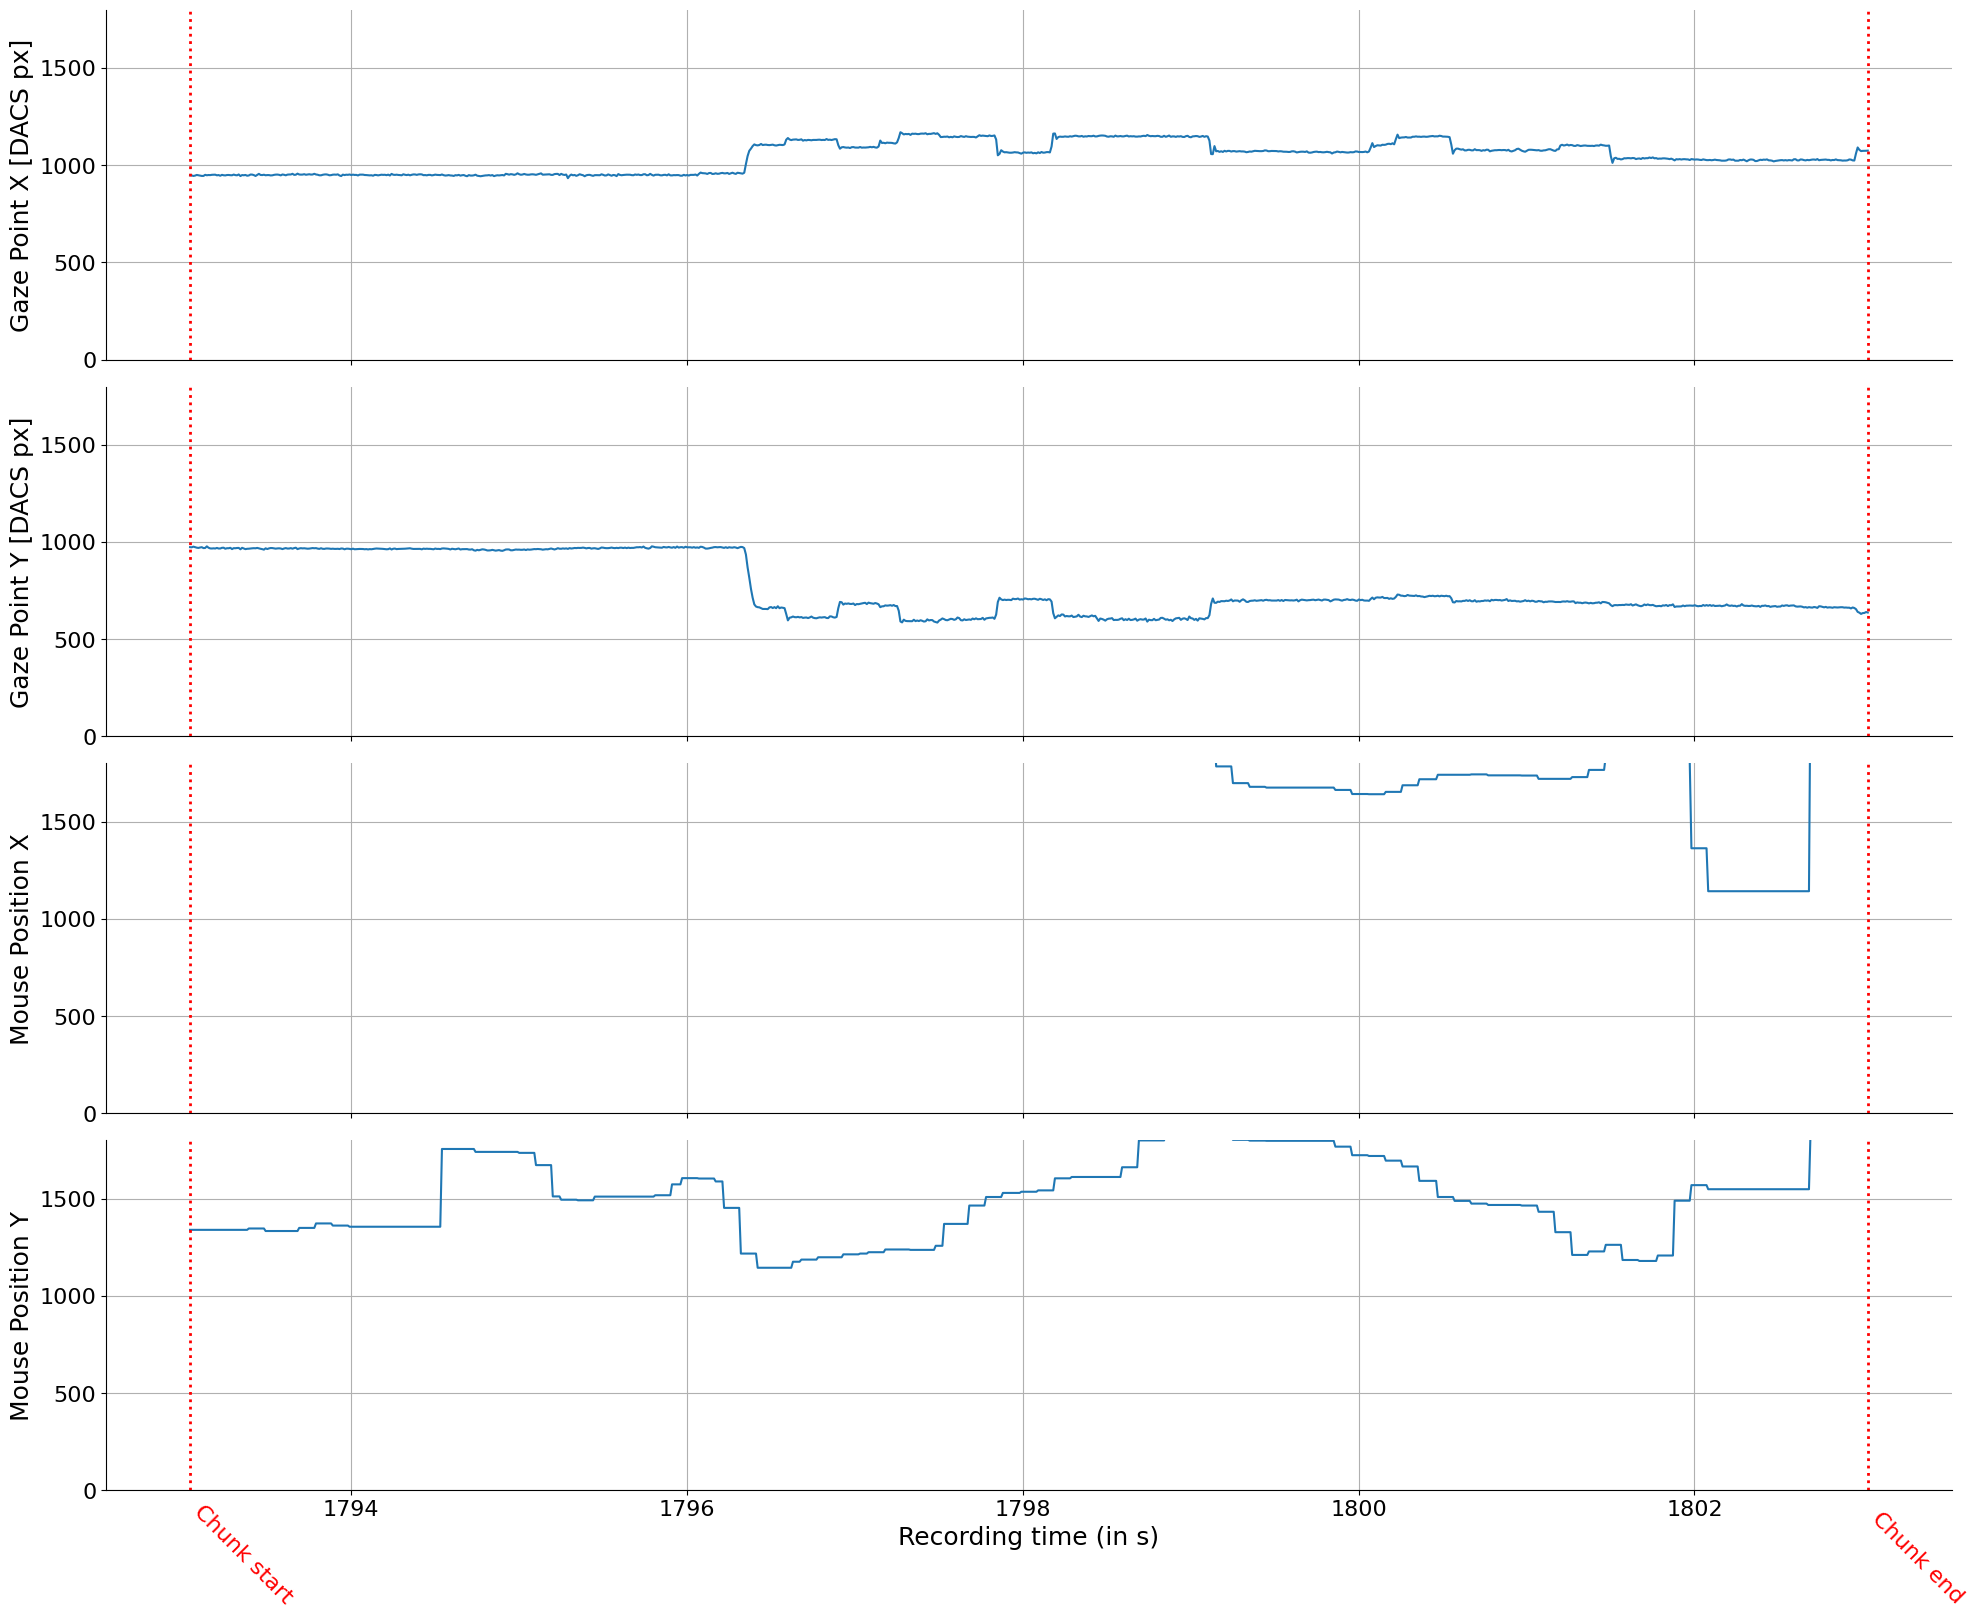

In [20]:
id_task = random.choice(list(chunks.keys()))
print(id_task)
task_plot = jcafnet_enriched_chunks[id_task]

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
# Convert timestamps to seconds
timestamps_sec = task_plot["Recording timestamp [ms]"] / 1e3
start_time_sec = task_plot.iloc[0]["Recording timestamp [ms]"] / 1e3
end_time_sec = task_plot.iloc[-1]["Recording timestamp [ms]"] / 1e3

# Titles for each subplot
titles = ['Gaze Point X [DACS px]', 'Gaze Point Y [DACS px]', 'Mouse Position X', 'Mouse Position Y']
data_columns = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task_plot[col], label=title)
    ax.axvline(x=start_time_sec, color='red', linestyle=':', linewidth=2)
    ax.axvline(x=end_time_sec, color='red', linestyle=':', linewidth=2)
    ax.set_ylim(0, 1800)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Add labels directly to vertical lines on the top subplot only
axs[-1].text(start_time_sec, -600, 'Chunk start', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)
axs[-1].text(end_time_sec, -600, 'Chunk end', color='red', rotation=-45, verticalalignment='bottom', fontsize = 16)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

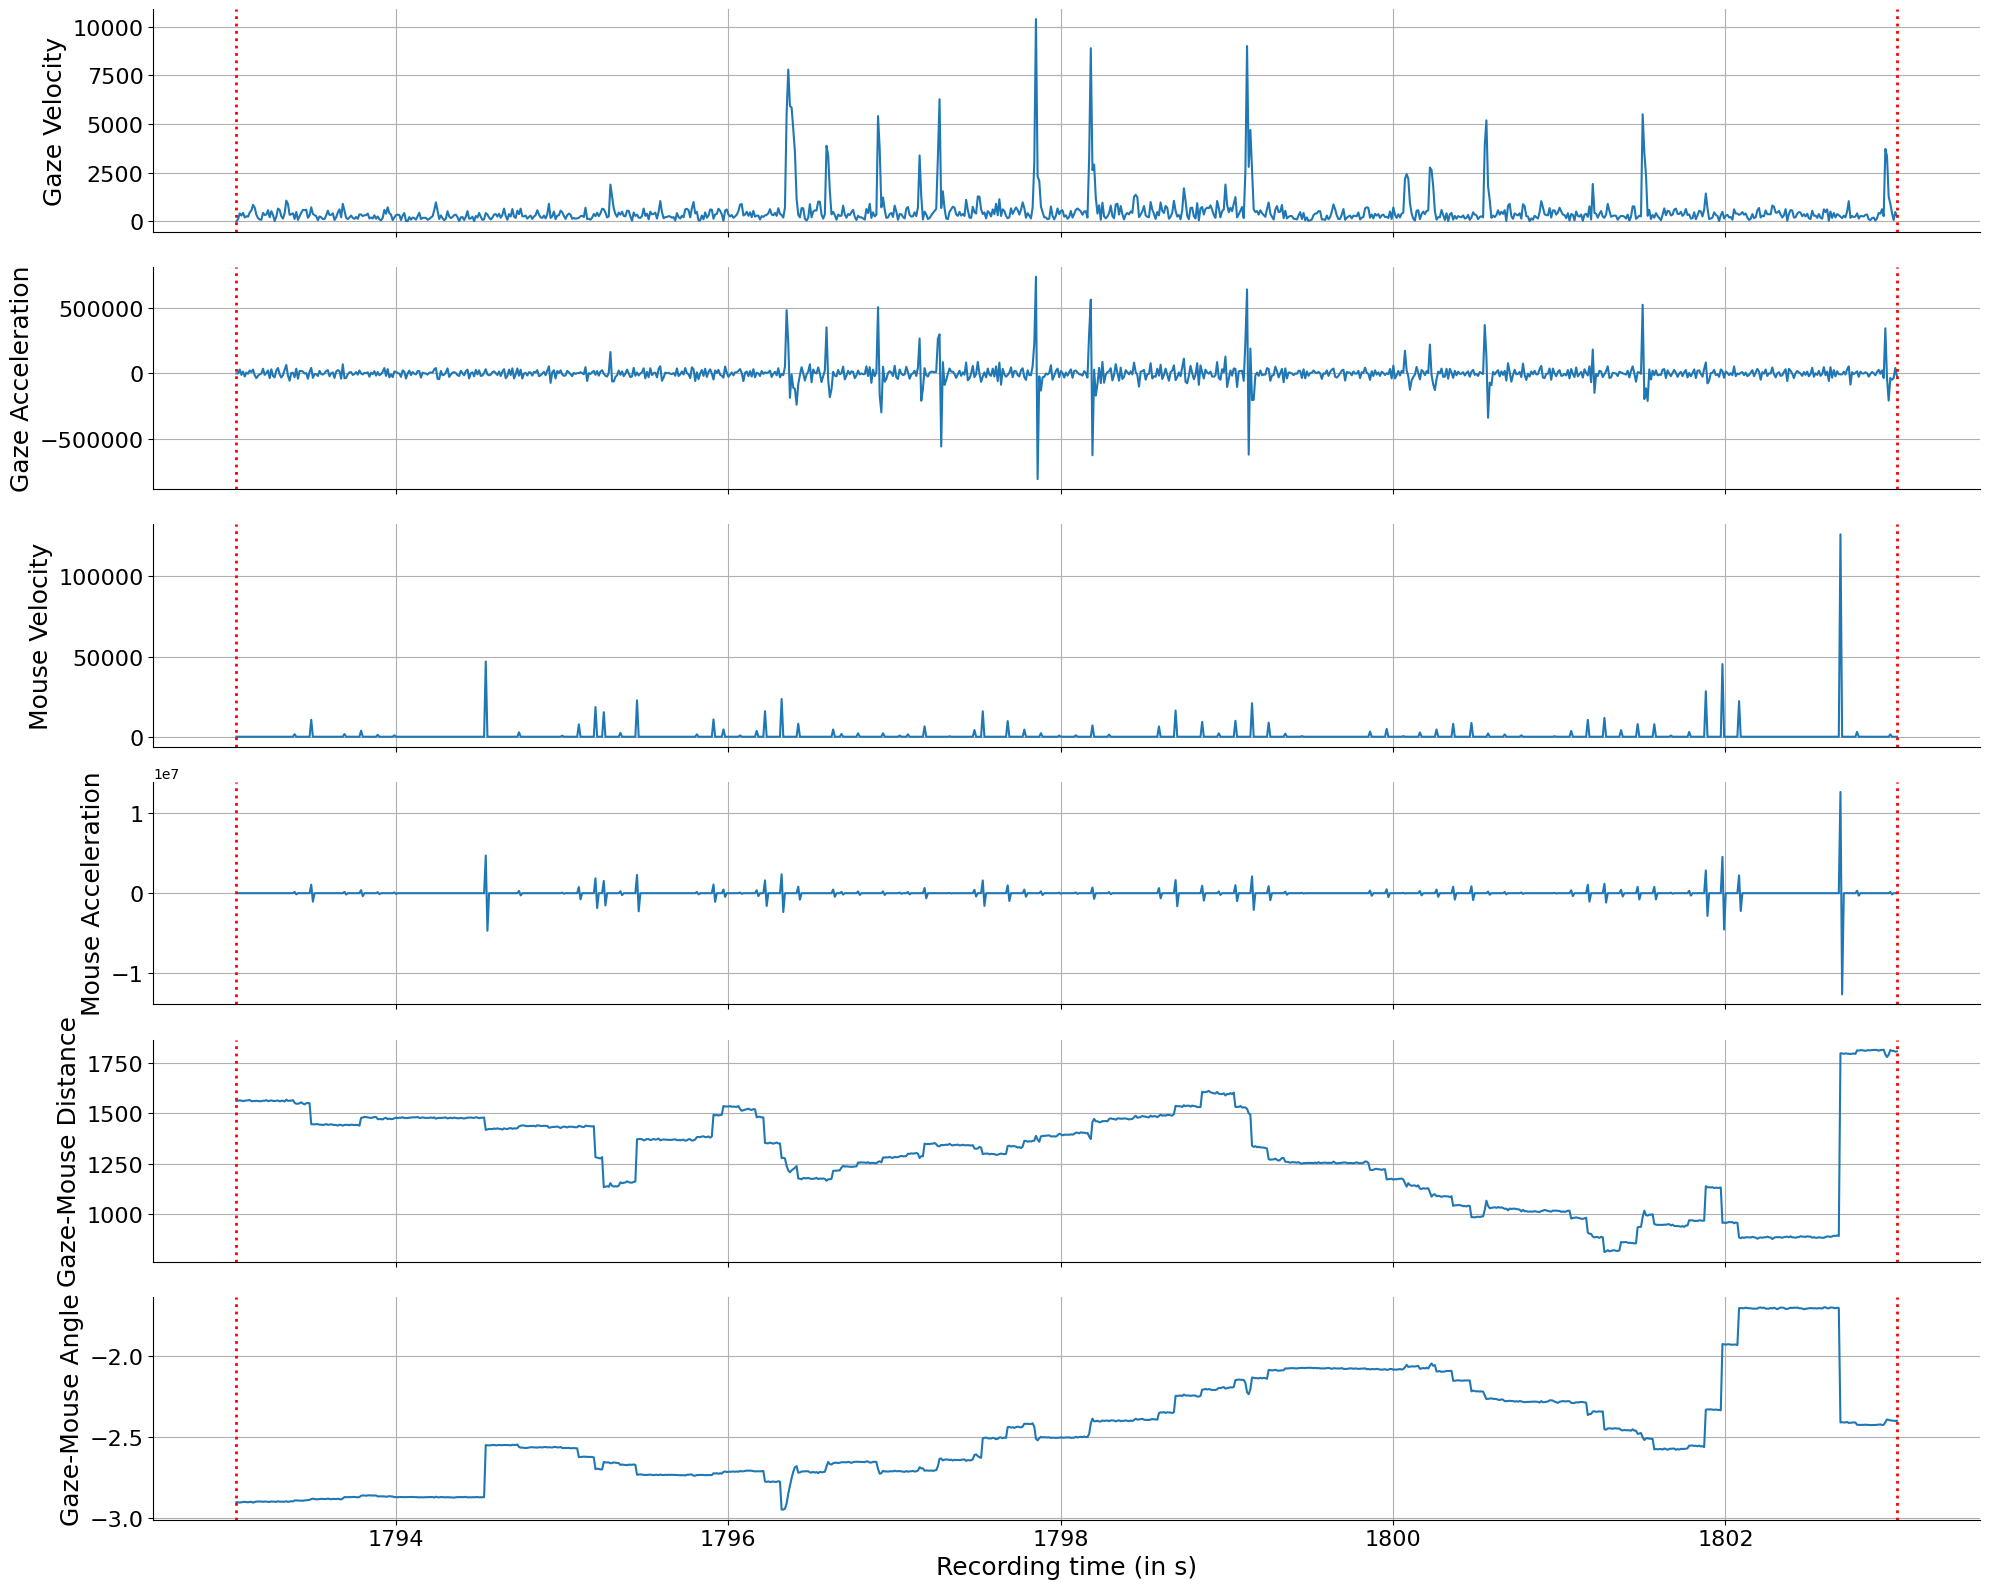

In [24]:
fig, axs = plt.subplots(6, 1, figsize=(20, 16), sharex=True)
# Convert timestamps to seconds
timestamps_sec = task_plot["Recording timestamp [ms]"] / 1e3
start_time_sec = task_plot.iloc[0]["Recording timestamp [ms]"] / 1e3
end_time_sec = task_plot.iloc[-1]["Recording timestamp [ms]"] / 1e3

# Titles for each subplot
titles = ['Gaze Velocity', 'Gaze Acceleration', 'Mouse Velocity', 'Mouse Acceleration', 'Gaze-Mouse Distance', 'Gaze-Mouse Angle']
data_columns = ['Gaze Velocity', 'Gaze Acceleration', 'Mouse Velocity', 'Mouse Acceleration', 'Gaze-Mouse Distance', 'Angle Between Gaze and Mouse']

# Plot each subplot
for ax, title, col in zip(axs, titles, data_columns):
    ax.plot(timestamps_sec, task_plot[col], label=title)
    ax.axvline(x=start_time_sec, color='red', linestyle=':', linewidth=2)
    ax.axvline(x=end_time_sec, color='red', linestyle=':', linewidth=2)
    ax.set_ylabel(title)
    ax.grid(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# X-axis label on the last subplot
axs[-1].set_xlabel('Recording time (in s)', fontsize = 18)

for ax in axs:
    ax.tick_params(axis='both', labelsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.tight_layout()
plt.show()

****
# XGBoost processing
****

In [37]:
import pandas as pd
from utils.data_processing import GazeMetricsProcessor, MouseMetricsProcessor

gaze_metrics = []
mouse_metrics = []

for task_id, chunk in chunks.items():
        for col in fill_columns:
            chunks[task_id][col] = chunks[task_id][col].ffill().bfill()

for id, chunk_df in chunks.items():
    
    # Extracting gaze metrics
    gaze_processor = GazeMetricsProcessor(chunk_df, timestamp_unit="ms")
    gaze_compute = gaze_processor.compute_all_metrics()
    gaze_compute.update({"id": id})
    gaze_compute.update({"participant_id": chunk_df["Participant name"].iloc[0]})
    gaze_compute.update({"Task_id": chunk_df["Task_id"].iloc[0]})
    gaze_metrics.append(gaze_compute)
    
    # Extracting mouse metrics
    mouse_processor = MouseMetricsProcessor(chunk_df, timestamp_unit="ms")
    mouse_compute = mouse_processor.compute_all_metrics()
    mouse_compute.update({"id": id})
    mouse_compute.update({"participant_id": chunk_df["Participant name"].iloc[0]})
    mouse_compute.update({"Task_id": chunk_df["Task_id"].iloc[0]})
    mouse_metrics.append(mouse_compute)
    
gaze_metrics_df = pd.DataFrame(gaze_metrics)
mouse_metrics_df = pd.DataFrame(mouse_metrics)

In [38]:
mouse_metrics_df

,Avg Mouse Velocity (px/s),Avg Mouse Acceleration (px/s²),Movement Frequency (movements/s),Total Idle Time (s),Click Count,Keyboard Count,Path Direction Changes,Total Distance Traveled (px),Number of Stops,Movement Bursts,Stillness Periods,Seconds per raw time unit,Timestamp column,Mouse X column,Mouse Y column,id,participant_id,Task_id
0,204.537948,4.661274e-13,3.003003,0.0,0,0,56,2043.334098,969,30,969,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,001_1_5_0,001,5
1,111.041694,0.000000e+00,1.701702,0.0,0,0,30,1109.306527,982,17,982,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,001_1_5_1,001,5
2,91.849116,0.000000e+00,1.401401,0.0,0,0,22,917.572666,985,14,985,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,001_1_5_2,001,5
3,36.828276,0.000000e+00,1.701702,0.0,0,0,24,367.914482,982,17,982,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,001_1_5_3,001,5
4,42.492736,1.820810e-14,2.402402,0.0,0,0,32,424.502430,975,24,975,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,001_1_5_4,001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31788,137.229400,-1.165319e-13,5.105105,0.0,0,0,72,1370.921704,948,51,948,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,023_3_1_9,023,1
31789,218.758639,2.913296e-13,5.205205,0.0,0,0,74,2185.398808,947,52,947,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,023_3_1_10,023,1
31790,163.474462,0.000000e+00,1.601602,0.0,0,0,32,1633.109875,983,16,983,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,023_3_1_11,023,1
31791,209.593416,1.165319e-13,2.202202,0.0,0,0,42,2093.838229,977,22,977,0.001,Recording timestamp [ms],Mouse position X,Mouse position Y,023_3_1_12,023,1


In [39]:
import importlib, utils.helper as helper
importlib.reload(helper)
from utils.helper import drop_chunks_with_all_zero_features

columns_to_extract = ['Gaze point X [DACS px]', 'Gaze point Y [DACS px]', 'Mouse position X', 'Mouse position Y']
cleaned_chunks_xgb = drop_chunks_with_all_zero_features(chunks, feature_cols=columns_to_extract, threshold=0.5)

Dropped 1 chunks (threshold=0.5): ['017_3_13_75']


In [49]:
import trainings._02_xgboost_training as xgb_train
importlib.reload(xgb_train)
from trainings._02_xgboost_training import extract_tsfresh_features_from_chunks

tsfresh_data = extract_tsfresh_features_from_chunks(
        cleaned_chunks_xgb, 
        columns_to_extract, 
        pval_threshold=0.05, 
        n_jobs=100)

Extracting TSFresh features...


Feature Extraction: 100%|██████████| 499/499 [00:31<00:00, 16.09it/s]


In [60]:
cols_to_drop = [
    "Seconds per raw time unit",
    "Timestamp column",
    "Gaze X column", "Gaze Y column",
    "Mouse X column", "Mouse Y column",
]

gaze = gaze_metrics_df.drop(columns=cols_to_drop, errors="ignore")
mouse = mouse_metrics_df.drop(columns=cols_to_drop, errors="ignore")
merge_keys = ["id", "participant_id", "Task_id"]
merged = gaze.merge(mouse, on=merge_keys, how="inner", suffixes=("_gaze", "_mouse"))
final_merged = merged.merge(tsfresh_data, on="id", how="inner")

In [62]:
final_merged.columns

Index(['Fixation Count', 'Total Fixation Duration (s)',
       'Avg Fixation Duration (s)', 'Saccade Count',
       'Avg Saccade Amplitude (px)', 'Avg Saccade Velocity (px/s)',
       'Avg Gaze Velocity (px/s)', 'Avg Gaze Acceleration (px/s²)',
       'Blink Rate (blinks/s)', 'Gaze Dispersion (area_px²)', 'id',
       'participant_id', 'Task_id', 'Avg Mouse Velocity (px/s)',
       'Avg Mouse Acceleration (px/s²)', 'Movement Frequency (movements/s)',
       'Total Idle Time (s)', 'Click Count', 'Keyboard Count',
       'Path Direction Changes', 'Total Distance Traveled (px)',
       'Number of Stops', 'Movement Bursts', 'Stillness Periods',
       'Gaze point Y [DACS px]__variance',
       'Gaze point Y [DACS px]__standard_deviation',
       'Mouse position Y__root_mean_square',
       'Gaze point X [DACS px]__root_mean_square',
       'Gaze point Y [DACS px]__root_mean_square',
       'Gaze point Y [DACS px]__maximum',
       'Gaze point Y [DACS px]__absolute_maximum', 'Mouse position